In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from scipy.io import arff
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import keras.backend as K
from keras import regularizers
import keras_tuner as kt
from keras.utils.vis_utils import plot_model
from multi_label_metrics import *
from label_info import label_counter
import seaborn as sns
tfk = tf.keras
tf.keras.backend.set_floatx("float32")
import tensorflow_probability as tfp
tfd = tfp.distributions
neg_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)
Adam = tf.keras.optimizers.Adam


In [2]:
from numpy.random import seed
seed(2322)
from tensorflow.random import set_seed
set_seed(650)
y_org = np.genfromtxt('bedadhes.txt')

In [3]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
y = NormalizeData(y_org)
y_org.max()

0.7238666666666667

In [4]:
x= np.genfromtxt('inp_data.txt')

In [5]:
x= NormalizeData(x)

In [6]:
rows = np.shape(y)[0]

In [7]:
np.histogram(y_org,bins=[0,0.2,0.6,y_org.max()])

(array([575, 670,  28], dtype=int64),
 array([0.        , 0.2       , 0.6       , 0.72386667]))

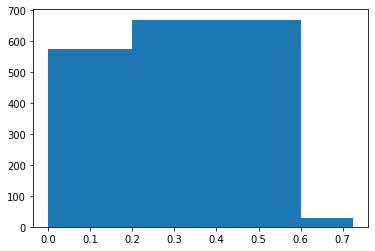

In [8]:
plt.hist(y_org,bins=[0,0.2,0.6,y_org.max()])
y=y_org

In [9]:
y_multi = np.zeros((np.shape(y)[0],3))

In [10]:
for i in range(np.shape(y)[0]):
    if 0<=y[i]<=0.2:
        y_multi[i][0] = 1
    if 0.33<y[i]<=0.6:
        y_multi[i][1] = 1
    if 0.67<y[i]<=y.max():
        y_multi[i][2] = 1

In [11]:
y_multi

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
split_index = int(rows * 0.8)
x_train = x[:split_index,:]
x_test = x[split_index:,:]
y_train = y_multi[:split_index,:]
y_test = y_multi[split_index:,:]

In [13]:
train_size = np.shape(x_train)[0]
train_size
input_dim = np.shape(x_train)[1]
output_dim = np.shape(y_train)[1]

In [14]:
def create_model():
    kl_divergence_function = (lambda q, p, _: tfd.kl_divergence(q, p) / tf.cast(train_size, dtype='float32'))

    model = tf.keras.models.Sequential([
          Dense(
              100,activation='sigmoid',input_dim=input_dim, dtype ='float32'),
          Dense(
              80,activation='sigmoid',dtype ='float32'),
          Dense(
              50, activation='sigmoid', dtype ='float32'),
          Dense(
              10, activation='sigmoid', dtype ='float32'),
          tfp.layers.DenseFlipout(
             output_dim, kernel_divergence_fn=kl_divergence_function,activation='softmax', dtype ='float32'),
  ])
    return model
model = create_model()

C:\Users\zhang\anaconda3\lib\site-packages\tensorflow_probability\python\layers\util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  loc = add_variable_fn(
C:\Users\zhang\anaconda3\lib\site-packages\tensorflow_probability\python\layers\util.py:105: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  untransformed_scale = add_variable_fn(


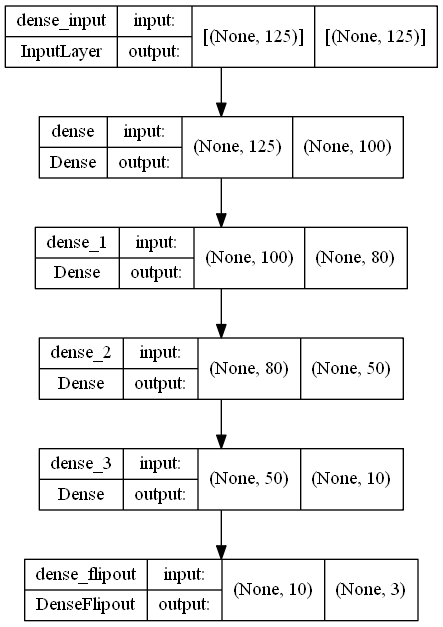

In [15]:

plot_model(model, to_file='./Model_Last_Layer_BNN_3D.png', show_shapes=True)

In [16]:
model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4),metrics=['accuracy',hamming_loss,precision_micro,recall_micro,f1_micro])

In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(x_train,y_train,epochs=500,batch_size=256,validation_split=0.15,shuffle=True)

Epoch 1/500
4/4 [==============================] - 2s 145ms/step - loss: 0.8040 - accuracy: 0.5850 - hamming_loss: 0.2254 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.7692 - val_accuracy: 0.6471 - val_hamming_loss: 0.2200 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 2/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7901 - accuracy: 0.6694 - hamming_loss: 0.2318 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.7609 - val_accuracy: 0.6275 - val_hamming_loss: 0.2200 - val_precision_micro: 0.0000e+00 - val_recall_micro: 0.0000e+00 - val_f1_micro: 0.0000e+00
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7810 - accuracy: 0.7410 - hamming_loss: 0.2275 - precision_micro: 0.0000e+00 - recall_micro: 0.0000e+00 - f1_micro: 0.0000e+00 - val_loss: 0.7460 - val_accuracy: 0.7124 - val_hamming_loss: 0.2200 - val

Epoch 25/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6559 - accuracy: 0.7780 - hamming_loss: 0.2366 - precision_micro: 0.4847 - recall_micro: 0.4930 - f1_micro: 0.4875 - val_loss: 0.6660 - val_accuracy: 0.7320 - val_hamming_loss: 0.2636 - val_precision_micro: 0.4107 - val_recall_micro: 0.4554 - val_f1_micro: 0.4319
Epoch 26/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6562 - accuracy: 0.7780 - hamming_loss: 0.2435 - precision_micro: 0.4676 - recall_micro: 0.5131 - f1_micro: 0.4880 - val_loss: 0.6645 - val_accuracy: 0.7320 - val_hamming_loss: 0.2898 - val_precision_micro: 0.3769 - val_recall_micro: 0.4851 - val_f1_micro: 0.4242
Epoch 27/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6548 - accuracy: 0.7757 - hamming_loss: 0.2389 - precision_micro: 0.4842 - recall_micro: 0.5042 - f1_micro: 0.4934 - val_loss: 0.6672 - val_accuracy: 0.7320 - val_hamming_loss: 0.2789 - val_precision_micro: 0.3866 - val_recall_micro: 0.4554 - val_

4/4 [==============================] - 0s 12ms/step - loss: 0.6439 - accuracy: 0.7780 - hamming_loss: 0.2424 - precision_micro: 0.4809 - recall_micro: 0.5339 - f1_micro: 0.5040 - val_loss: 0.6555 - val_accuracy: 0.7255 - val_hamming_loss: 0.2680 - val_precision_micro: 0.3962 - val_recall_micro: 0.4158 - val_f1_micro: 0.4058
Epoch 50/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6410 - accuracy: 0.7780 - hamming_loss: 0.2374 - precision_micro: 0.4781 - recall_micro: 0.5035 - f1_micro: 0.4903 - val_loss: 0.6540 - val_accuracy: 0.7320 - val_hamming_loss: 0.2789 - val_precision_micro: 0.3920 - val_recall_micro: 0.4851 - val_f1_micro: 0.4336
Epoch 51/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6455 - accuracy: 0.7780 - hamming_loss: 0.2373 - precision_micro: 0.4913 - recall_micro: 0.5528 - f1_micro: 0.5191 - val_loss: 0.6498 - val_accuracy: 0.7320 - val_hamming_loss: 0.2876 - val_precision_micro: 0.3604 - val_recall_micro: 0.3960 - val_f1_micro: 0.3

4/4 [==============================] - 0s 11ms/step - loss: 0.6416 - accuracy: 0.7780 - hamming_loss: 0.2413 - precision_micro: 0.4768 - recall_micro: 0.5086 - f1_micro: 0.4918 - val_loss: 0.6510 - val_accuracy: 0.7320 - val_hamming_loss: 0.2832 - val_precision_micro: 0.3761 - val_recall_micro: 0.4356 - val_f1_micro: 0.4037
Epoch 74/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6395 - accuracy: 0.7780 - hamming_loss: 0.2378 - precision_micro: 0.4910 - recall_micro: 0.5840 - f1_micro: 0.5327 - val_loss: 0.6436 - val_accuracy: 0.7320 - val_hamming_loss: 0.2789 - val_precision_micro: 0.3784 - val_recall_micro: 0.4158 - val_f1_micro: 0.3962
Epoch 75/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6383 - accuracy: 0.7780 - hamming_loss: 0.2412 - precision_micro: 0.4860 - recall_micro: 0.5494 - f1_micro: 0.5156 - val_loss: 0.6378 - val_accuracy: 0.7320 - val_hamming_loss: 0.2614 - val_precision_micro: 0.4228 - val_recall_micro: 0.5149 - val_f1_micro: 0.4

4/4 [==============================] - 0s 12ms/step - loss: 0.6355 - accuracy: 0.7780 - hamming_loss: 0.2390 - precision_micro: 0.4801 - recall_micro: 0.5226 - f1_micro: 0.4998 - val_loss: 0.6444 - val_accuracy: 0.7320 - val_hamming_loss: 0.2810 - val_precision_micro: 0.3814 - val_recall_micro: 0.4455 - val_f1_micro: 0.4110
Epoch 98/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6388 - accuracy: 0.7723 - hamming_loss: 0.2395 - precision_micro: 0.4852 - recall_micro: 0.5637 - f1_micro: 0.5196 - val_loss: 0.6453 - val_accuracy: 0.7320 - val_hamming_loss: 0.2680 - val_precision_micro: 0.3962 - val_recall_micro: 0.4158 - val_f1_micro: 0.4058
Epoch 99/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6373 - accuracy: 0.7769 - hamming_loss: 0.2443 - precision_micro: 0.4773 - recall_micro: 0.5371 - f1_micro: 0.5051 - val_loss: 0.6513 - val_accuracy: 0.7320 - val_hamming_loss: 0.2876 - val_precision_micro: 0.3760 - val_recall_micro: 0.4653 - val_f1_micro: 0.4

4/4 [==============================] - 0s 11ms/step - loss: 0.6425 - accuracy: 0.7780 - hamming_loss: 0.2518 - precision_micro: 0.4602 - recall_micro: 0.5308 - f1_micro: 0.4925 - val_loss: 0.6530 - val_accuracy: 0.7320 - val_hamming_loss: 0.2810 - val_precision_micro: 0.3814 - val_recall_micro: 0.4455 - val_f1_micro: 0.4110
Epoch 122/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6428 - accuracy: 0.7723 - hamming_loss: 0.2544 - precision_micro: 0.4545 - recall_micro: 0.5261 - f1_micro: 0.4870 - val_loss: 0.6465 - val_accuracy: 0.7320 - val_hamming_loss: 0.2658 - val_precision_micro: 0.4146 - val_recall_micro: 0.5050 - val_f1_micro: 0.4554
Epoch 123/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6424 - accuracy: 0.7757 - hamming_loss: 0.2470 - precision_micro: 0.4693 - recall_micro: 0.4834 - f1_micro: 0.4759 - val_loss: 0.6397 - val_accuracy: 0.7320 - val_hamming_loss: 0.2593 - val_precision_micro: 0.4237 - val_recall_micro: 0.4950 - val_f1_micro: 0

4/4 [==============================] - 0s 11ms/step - loss: 0.6442 - accuracy: 0.7780 - hamming_loss: 0.2458 - precision_micro: 0.4718 - recall_micro: 0.5280 - f1_micro: 0.4980 - val_loss: 0.6495 - val_accuracy: 0.7386 - val_hamming_loss: 0.2832 - val_precision_micro: 0.3717 - val_recall_micro: 0.4158 - val_f1_micro: 0.3925
Epoch 146/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6461 - accuracy: 0.7757 - hamming_loss: 0.2465 - precision_micro: 0.4756 - recall_micro: 0.5233 - f1_micro: 0.4972 - val_loss: 0.6457 - val_accuracy: 0.7320 - val_hamming_loss: 0.2898 - val_precision_micro: 0.3873 - val_recall_micro: 0.5446 - val_f1_micro: 0.4527
Epoch 147/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6377 - accuracy: 0.7746 - hamming_loss: 0.2543 - precision_micro: 0.4564 - recall_micro: 0.5068 - f1_micro: 0.4795 - val_loss: 0.6624 - val_accuracy: 0.7320 - val_hamming_loss: 0.2789 - val_precision_micro: 0.3636 - val_recall_micro: 0.3564 - val_f1_micro: 0

4/4 [==============================] - 0s 11ms/step - loss: 0.6379 - accuracy: 0.7780 - hamming_loss: 0.2476 - precision_micro: 0.4665 - recall_micro: 0.5158 - f1_micro: 0.4886 - val_loss: 0.6382 - val_accuracy: 0.7320 - val_hamming_loss: 0.2680 - val_precision_micro: 0.4035 - val_recall_micro: 0.4554 - val_f1_micro: 0.4279
Epoch 170/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6365 - accuracy: 0.7734 - hamming_loss: 0.2380 - precision_micro: 0.4861 - recall_micro: 0.5400 - f1_micro: 0.5115 - val_loss: 0.6417 - val_accuracy: 0.7255 - val_hamming_loss: 0.2658 - val_precision_micro: 0.4103 - val_recall_micro: 0.4752 - val_f1_micro: 0.4404
Epoch 171/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6410 - accuracy: 0.7757 - hamming_loss: 0.2514 - precision_micro: 0.4568 - recall_micro: 0.5295 - f1_micro: 0.4895 - val_loss: 0.6379 - val_accuracy: 0.7320 - val_hamming_loss: 0.2876 - val_precision_micro: 0.3760 - val_recall_micro: 0.4653 - val_f1_micro: 0

4/4 [==============================] - 0s 12ms/step - loss: 0.6325 - accuracy: 0.7769 - hamming_loss: 0.2398 - precision_micro: 0.4863 - recall_micro: 0.5478 - f1_micro: 0.5151 - val_loss: 0.6511 - val_accuracy: 0.7320 - val_hamming_loss: 0.2789 - val_precision_micro: 0.3784 - val_recall_micro: 0.4158 - val_f1_micro: 0.3962
Epoch 194/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6406 - accuracy: 0.7757 - hamming_loss: 0.2532 - precision_micro: 0.4602 - recall_micro: 0.5320 - f1_micro: 0.4929 - val_loss: 0.6385 - val_accuracy: 0.7320 - val_hamming_loss: 0.2789 - val_precision_micro: 0.4043 - val_recall_micro: 0.5644 - val_f1_micro: 0.4711
Epoch 195/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6406 - accuracy: 0.7780 - hamming_loss: 0.2521 - precision_micro: 0.4626 - recall_micro: 0.5367 - f1_micro: 0.4966 - val_loss: 0.6509 - val_accuracy: 0.7320 - val_hamming_loss: 0.2810 - val_precision_micro: 0.3704 - val_recall_micro: 0.3960 - val_f1_micro: 0

4/4 [==============================] - 0s 10ms/step - loss: 0.6380 - accuracy: 0.7780 - hamming_loss: 0.2461 - precision_micro: 0.4685 - recall_micro: 0.5498 - f1_micro: 0.5057 - val_loss: 0.6405 - val_accuracy: 0.7320 - val_hamming_loss: 0.2789 - val_precision_micro: 0.3866 - val_recall_micro: 0.4554 - val_f1_micro: 0.4182
Epoch 218/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6415 - accuracy: 0.7723 - hamming_loss: 0.2536 - precision_micro: 0.4533 - recall_micro: 0.5127 - f1_micro: 0.4809 - val_loss: 0.6525 - val_accuracy: 0.7320 - val_hamming_loss: 0.2898 - val_precision_micro: 0.3596 - val_recall_micro: 0.4059 - val_f1_micro: 0.3814
Epoch 219/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6403 - accuracy: 0.7757 - hamming_loss: 0.2511 - precision_micro: 0.4601 - recall_micro: 0.5474 - f1_micro: 0.4977 - val_loss: 0.6400 - val_accuracy: 0.7320 - val_hamming_loss: 0.2789 - val_precision_micro: 0.3920 - val_recall_micro: 0.4851 - val_f1_micro: 0

4/4 [==============================] - 0s 12ms/step - loss: 0.6370 - accuracy: 0.7769 - hamming_loss: 0.2485 - precision_micro: 0.4615 - recall_micro: 0.5272 - f1_micro: 0.4918 - val_loss: 0.6411 - val_accuracy: 0.7255 - val_hamming_loss: 0.2636 - val_precision_micro: 0.4138 - val_recall_micro: 0.4752 - val_f1_micro: 0.4424
Epoch 242/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6361 - accuracy: 0.7769 - hamming_loss: 0.2526 - precision_micro: 0.4629 - recall_micro: 0.5555 - f1_micro: 0.5045 - val_loss: 0.6271 - val_accuracy: 0.7386 - val_hamming_loss: 0.2680 - val_precision_micro: 0.3942 - val_recall_micro: 0.4059 - val_f1_micro: 0.4000
Epoch 243/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6405 - accuracy: 0.7780 - hamming_loss: 0.2525 - precision_micro: 0.4614 - recall_micro: 0.5347 - f1_micro: 0.4952 - val_loss: 0.6455 - val_accuracy: 0.7320 - val_hamming_loss: 0.2636 - val_precision_micro: 0.4206 - val_recall_micro: 0.5248 - val_f1_micro: 0

4/4 [==============================] - 0s 11ms/step - loss: 0.6338 - accuracy: 0.7723 - hamming_loss: 0.2468 - precision_micro: 0.4704 - recall_micro: 0.5456 - f1_micro: 0.5045 - val_loss: 0.6329 - val_accuracy: 0.7320 - val_hamming_loss: 0.2680 - val_precision_micro: 0.4068 - val_recall_micro: 0.4752 - val_f1_micro: 0.4384
Epoch 266/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6342 - accuracy: 0.7769 - hamming_loss: 0.2466 - precision_micro: 0.4654 - recall_micro: 0.5459 - f1_micro: 0.5021 - val_loss: 0.6381 - val_accuracy: 0.7320 - val_hamming_loss: 0.2745 - val_precision_micro: 0.4016 - val_recall_micro: 0.5050 - val_f1_micro: 0.4474
Epoch 267/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6340 - accuracy: 0.7769 - hamming_loss: 0.2437 - precision_micro: 0.4743 - recall_micro: 0.5505 - f1_micro: 0.5093 - val_loss: 0.6382 - val_accuracy: 0.7320 - val_hamming_loss: 0.2789 - val_precision_micro: 0.4000 - val_recall_micro: 0.5347 - val_f1_micro: 0

4/4 [==============================] - 0s 11ms/step - loss: 0.6324 - accuracy: 0.7746 - hamming_loss: 0.2424 - precision_micro: 0.4746 - recall_micro: 0.5536 - f1_micro: 0.5110 - val_loss: 0.6364 - val_accuracy: 0.7320 - val_hamming_loss: 0.2789 - val_precision_micro: 0.3866 - val_recall_micro: 0.4554 - val_f1_micro: 0.4182
Epoch 290/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6331 - accuracy: 0.7780 - hamming_loss: 0.2431 - precision_micro: 0.4836 - recall_micro: 0.5788 - f1_micro: 0.5262 - val_loss: 0.6383 - val_accuracy: 0.7320 - val_hamming_loss: 0.2723 - val_precision_micro: 0.4077 - val_recall_micro: 0.5248 - val_f1_micro: 0.4589
Epoch 291/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6279 - accuracy: 0.7688 - hamming_loss: 0.2381 - precision_micro: 0.4847 - recall_micro: 0.5502 - f1_micro: 0.5150 - val_loss: 0.6422 - val_accuracy: 0.7386 - val_hamming_loss: 0.2593 - val_precision_micro: 0.4167 - val_recall_micro: 0.4455 - val_f1_micro: 0

4/4 [==============================] - 0s 10ms/step - loss: 0.6300 - accuracy: 0.7769 - hamming_loss: 0.2387 - precision_micro: 0.4810 - recall_micro: 0.5619 - f1_micro: 0.5179 - val_loss: 0.6367 - val_accuracy: 0.7320 - val_hamming_loss: 0.2702 - val_precision_micro: 0.4034 - val_recall_micro: 0.4752 - val_f1_micro: 0.4364
Epoch 314/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6350 - accuracy: 0.7780 - hamming_loss: 0.2430 - precision_micro: 0.4767 - recall_micro: 0.5715 - f1_micro: 0.5194 - val_loss: 0.6404 - val_accuracy: 0.7320 - val_hamming_loss: 0.2832 - val_precision_micro: 0.3926 - val_recall_micro: 0.5248 - val_f1_micro: 0.4492
Epoch 315/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6275 - accuracy: 0.7792 - hamming_loss: 0.2469 - precision_micro: 0.4741 - recall_micro: 0.5152 - f1_micro: 0.4936 - val_loss: 0.6383 - val_accuracy: 0.7320 - val_hamming_loss: 0.2854 - val_precision_micro: 0.3750 - val_recall_micro: 0.4455 - val_f1_micro: 0

4/4 [==============================] - 0s 12ms/step - loss: 0.6305 - accuracy: 0.7780 - hamming_loss: 0.2455 - precision_micro: 0.4746 - recall_micro: 0.5732 - f1_micro: 0.5185 - val_loss: 0.6518 - val_accuracy: 0.7320 - val_hamming_loss: 0.2941 - val_precision_micro: 0.3629 - val_recall_micro: 0.4455 - val_f1_micro: 0.4000
Epoch 338/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6296 - accuracy: 0.7734 - hamming_loss: 0.2353 - precision_micro: 0.4984 - recall_micro: 0.5366 - f1_micro: 0.5153 - val_loss: 0.6387 - val_accuracy: 0.7320 - val_hamming_loss: 0.2789 - val_precision_micro: 0.3920 - val_recall_micro: 0.4851 - val_f1_micro: 0.4336
Epoch 339/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6347 - accuracy: 0.7688 - hamming_loss: 0.2528 - precision_micro: 0.4555 - recall_micro: 0.5320 - f1_micro: 0.4888 - val_loss: 0.6469 - val_accuracy: 0.7386 - val_hamming_loss: 0.2854 - val_precision_micro: 0.3729 - val_recall_micro: 0.4356 - val_f1_micro: 0

4/4 [==============================] - 0s 10ms/step - loss: 0.6313 - accuracy: 0.7769 - hamming_loss: 0.2517 - precision_micro: 0.4655 - recall_micro: 0.5415 - f1_micro: 0.4992 - val_loss: 0.6628 - val_accuracy: 0.7320 - val_hamming_loss: 0.2767 - val_precision_micro: 0.3796 - val_recall_micro: 0.4059 - val_f1_micro: 0.3923
Epoch 362/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6307 - accuracy: 0.7780 - hamming_loss: 0.2347 - precision_micro: 0.4937 - recall_micro: 0.5564 - f1_micro: 0.5228 - val_loss: 0.6396 - val_accuracy: 0.7320 - val_hamming_loss: 0.2767 - val_precision_micro: 0.4015 - val_recall_micro: 0.5248 - val_f1_micro: 0.4549
Epoch 363/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6337 - accuracy: 0.7757 - hamming_loss: 0.2426 - precision_micro: 0.4830 - recall_micro: 0.5433 - f1_micro: 0.5106 - val_loss: 0.6544 - val_accuracy: 0.7320 - val_hamming_loss: 0.2985 - val_precision_micro: 0.3475 - val_recall_micro: 0.4059 - val_f1_micro: 0

4/4 [==============================] - 0s 11ms/step - loss: 0.6379 - accuracy: 0.7780 - hamming_loss: 0.2528 - precision_micro: 0.4649 - recall_micro: 0.5256 - f1_micro: 0.4926 - val_loss: 0.6500 - val_accuracy: 0.7255 - val_hamming_loss: 0.2658 - val_precision_micro: 0.4103 - val_recall_micro: 0.4752 - val_f1_micro: 0.4404
Epoch 386/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6318 - accuracy: 0.7780 - hamming_loss: 0.2430 - precision_micro: 0.4796 - recall_micro: 0.5708 - f1_micro: 0.5206 - val_loss: 0.6370 - val_accuracy: 0.7320 - val_hamming_loss: 0.2832 - val_precision_micro: 0.3717 - val_recall_micro: 0.4158 - val_f1_micro: 0.3925
Epoch 387/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6335 - accuracy: 0.7780 - hamming_loss: 0.2536 - precision_micro: 0.4536 - recall_micro: 0.5279 - f1_micro: 0.4875 - val_loss: 0.6515 - val_accuracy: 0.7320 - val_hamming_loss: 0.2789 - val_precision_micro: 0.3884 - val_recall_micro: 0.4653 - val_f1_micro: 0

4/4 [==============================] - 0s 11ms/step - loss: 0.6317 - accuracy: 0.7711 - hamming_loss: 0.2469 - precision_micro: 0.4679 - recall_micro: 0.5174 - f1_micro: 0.4909 - val_loss: 0.6367 - val_accuracy: 0.7320 - val_hamming_loss: 0.2810 - val_precision_micro: 0.3871 - val_recall_micro: 0.4752 - val_f1_micro: 0.4267
Epoch 410/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6333 - accuracy: 0.7769 - hamming_loss: 0.2519 - precision_micro: 0.4639 - recall_micro: 0.5520 - f1_micro: 0.5040 - val_loss: 0.6394 - val_accuracy: 0.7320 - val_hamming_loss: 0.2680 - val_precision_micro: 0.4113 - val_recall_micro: 0.5050 - val_f1_micro: 0.4533
Epoch 411/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6341 - accuracy: 0.7711 - hamming_loss: 0.2404 - precision_micro: 0.4813 - recall_micro: 0.5362 - f1_micro: 0.5067 - val_loss: 0.6427 - val_accuracy: 0.7320 - val_hamming_loss: 0.2876 - val_precision_micro: 0.3740 - val_recall_micro: 0.4554 - val_f1_micro: 0

4/4 [==============================] - 0s 12ms/step - loss: 0.6325 - accuracy: 0.7780 - hamming_loss: 0.2450 - precision_micro: 0.4691 - recall_micro: 0.5420 - f1_micro: 0.5021 - val_loss: 0.6409 - val_accuracy: 0.7320 - val_hamming_loss: 0.2832 - val_precision_micro: 0.3910 - val_recall_micro: 0.5149 - val_f1_micro: 0.4444
Epoch 434/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6382 - accuracy: 0.7780 - hamming_loss: 0.2560 - precision_micro: 0.4484 - recall_micro: 0.4998 - f1_micro: 0.4724 - val_loss: 0.6330 - val_accuracy: 0.7320 - val_hamming_loss: 0.2810 - val_precision_micro: 0.3750 - val_recall_micro: 0.4158 - val_f1_micro: 0.3944
Epoch 435/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6360 - accuracy: 0.7723 - hamming_loss: 0.2541 - precision_micro: 0.4559 - recall_micro: 0.5322 - f1_micro: 0.4910 - val_loss: 0.6490 - val_accuracy: 0.7386 - val_hamming_loss: 0.2767 - val_precision_micro: 0.3774 - val_recall_micro: 0.3960 - val_f1_micro: 0

4/4 [==============================] - 0s 12ms/step - loss: 0.6303 - accuracy: 0.7757 - hamming_loss: 0.2436 - precision_micro: 0.4814 - recall_micro: 0.5686 - f1_micro: 0.5208 - val_loss: 0.6492 - val_accuracy: 0.7320 - val_hamming_loss: 0.2963 - val_precision_micro: 0.3622 - val_recall_micro: 0.4554 - val_f1_micro: 0.4035
Epoch 458/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6296 - accuracy: 0.7780 - hamming_loss: 0.2363 - precision_micro: 0.4942 - recall_micro: 0.5891 - f1_micro: 0.5372 - val_loss: 0.6445 - val_accuracy: 0.7320 - val_hamming_loss: 0.2876 - val_precision_micro: 0.3817 - val_recall_micro: 0.4950 - val_f1_micro: 0.4310
Epoch 459/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6330 - accuracy: 0.7723 - hamming_loss: 0.2492 - precision_micro: 0.4670 - recall_micro: 0.5170 - f1_micro: 0.4907 - val_loss: 0.6319 - val_accuracy: 0.7320 - val_hamming_loss: 0.2723 - val_precision_micro: 0.4048 - val_recall_micro: 0.5050 - val_f1_micro: 0

4/4 [==============================] - 0s 12ms/step - loss: 0.6355 - accuracy: 0.7757 - hamming_loss: 0.2500 - precision_micro: 0.4658 - recall_micro: 0.5370 - f1_micro: 0.4986 - val_loss: 0.6474 - val_accuracy: 0.7320 - val_hamming_loss: 0.2919 - val_precision_micro: 0.3540 - val_recall_micro: 0.3960 - val_f1_micro: 0.3738
Epoch 482/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6367 - accuracy: 0.7734 - hamming_loss: 0.2457 - precision_micro: 0.4733 - recall_micro: 0.5267 - f1_micro: 0.4974 - val_loss: 0.6439 - val_accuracy: 0.7320 - val_hamming_loss: 0.2702 - val_precision_micro: 0.4109 - val_recall_micro: 0.5248 - val_f1_micro: 0.4609
Epoch 483/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6292 - accuracy: 0.7769 - hamming_loss: 0.2451 - precision_micro: 0.4733 - recall_micro: 0.5518 - f1_micro: 0.5083 - val_loss: 0.6343 - val_accuracy: 0.7320 - val_hamming_loss: 0.2658 - val_precision_micro: 0.4160 - val_recall_micro: 0.5149 - val_f1_micro: 0

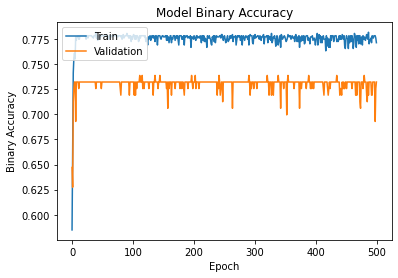

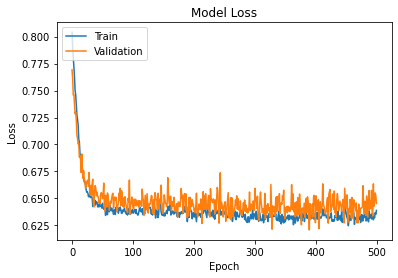

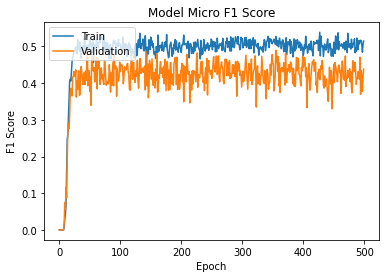

In [18]:
#Visualisation
#acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#f1
plt.plot(history.history['f1_micro'])
plt.plot(history.history['val_f1_micro'])
plt.title('Model Micro F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [19]:
loss, accuracy,hamming_loss,precision_micro,recall_micro,f1_micro = model.evaluate(x_test, y_test)
print('Test:')
print('Loss: %s\nBinary-Accuracy(the same as Micro-Accuracy): %s \nHamming_Loss: %s \nMicro-Precision: %s \nMicro-Recall: %s \nMicro-F1 Score: %s' % (loss, accuracy,hamming_loss,precision_micro,recall_micro,f1_micro))

8/8 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.7451 - hamming_loss: 0.2803 - precision_micro: 0.4051 - recall_micro: 0.4712 - f1_micro: 0.4333
Test:
Loss: 0.6668369770050049
Binary-Accuracy(the same as Micro-Accuracy): 0.7450980544090271 
Hamming_Loss: 0.28028395771980286 
Micro-Precision: 0.4051136374473572 
Micro-Recall: 0.4711968004703522 
Micro-F1 Score: 0.4333080053329468


In [20]:
instance_1 = np.reshape(x_test[45],(1,125))
instance_2 = np.reshape(x_test[50],(1,125))

In [21]:
num_ensemble = 500
y_pred_all_idx1 = []
y_pred_all_idx2 = []
y_pred_all = []
for e in range(num_ensemble):
    
    y_pred_idx1 = model.predict(instance_1)
    y_pred_all_idx1.append(y_pred_idx1)
    y_pred_idx2 = model.predict(instance_2)
    y_pred_all_idx2.append(y_pred_idx2)
    y_pred = model.predict(x_test)
    y_pred_all.append(y_pred)

In [22]:
y_pred_m_1 = np.mean(y_pred_all_idx1, axis=0)
y_pred_s_1 = np.std(y_pred_all_idx1, axis=0)
y_pred_m_2 = np.mean(y_pred_all_idx2, axis=0)
y_pred_s_2 = np.std(y_pred_all_idx2, axis=0)
y_pred_m = np.mean(y_pred_all,axis=0)
y_pred_s = np.std(y_pred_all,axis=0)

In [23]:
labels=np.linspace(1,3,3)


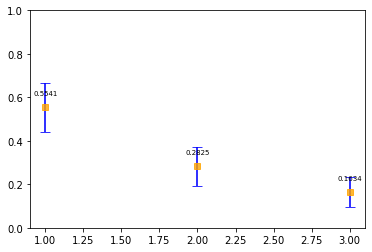

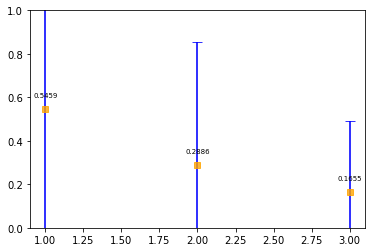

In [24]:
plt.errorbar(labels,y_pred_m_1[0],yerr=1.96*y_pred_s_1[0],fmt='s',ecolor='blue',color='orange',elinewidth=2,capsize=5,alpha=0.8)
plt.ylim((0, 1))
for a,b in zip(labels,y_pred_m_1[0]):
    plt.text(a, b+0.05, '%.4f' % b, ha='center', va= 'bottom',fontsize=7)
plt.savefig("./Last_Layer_BNN_Prediction_Exemple_1_3D.jpg" ,bbox_inches="tight")    
plt.show()
plt.errorbar(labels,y_pred_m[1],yerr=1.96*y_pred_m[1],fmt='s',ecolor='blue',color='orange',elinewidth=2,capsize=5,alpha=0.8)
plt.ylim((0, 1))
for a,b in zip(labels,y_pred_m[1]):
    plt.text(a, b+0.05, '%.4f' % b, ha='center', va= 'bottom',fontsize=7)
plt.savefig("./Last_Layer_BNN_Prediction_Exemple_2_3D.jpg" ,bbox_inches="tight")  
plt.show()


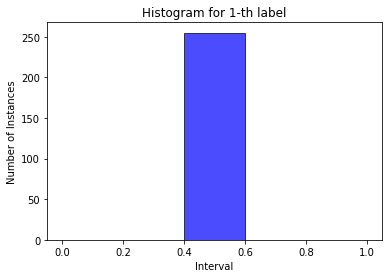

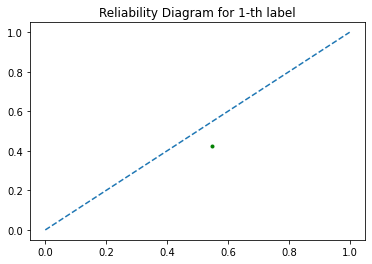

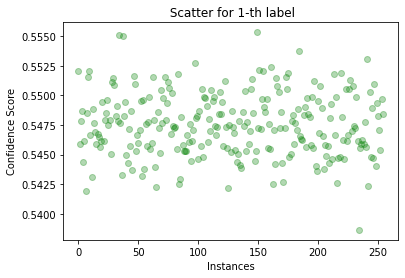

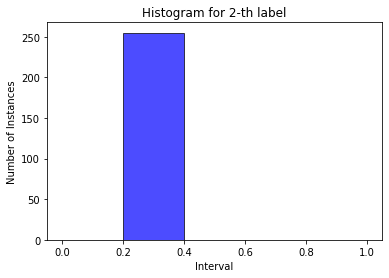

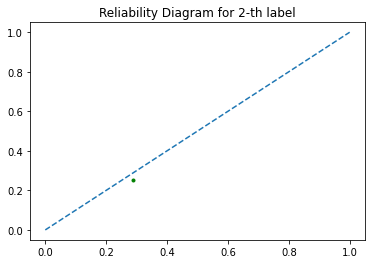

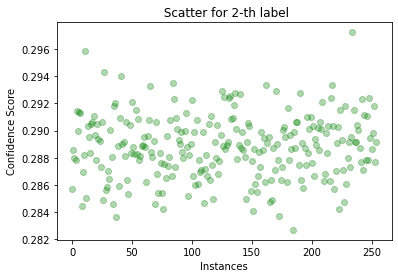

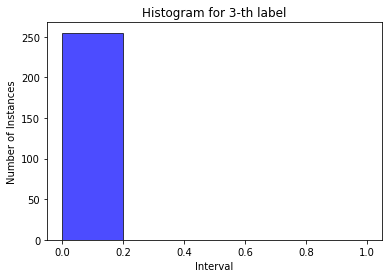

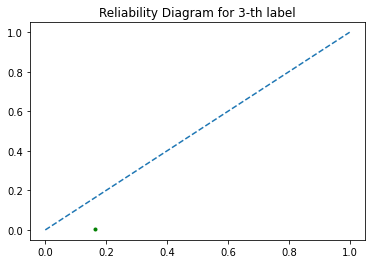

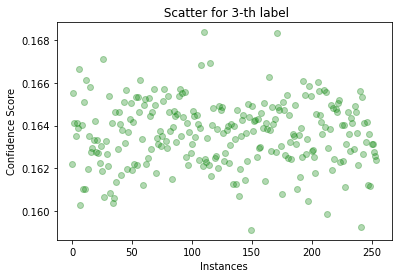

Expected Calibration Error for each label = [0.12403084133185588, 0.03784920538173003, 0.15968857372508327]
Average Expected Calibration Error for all labels = 0.10718954014622306


In [25]:
from sklearn.calibration import calibration_curve
from BM import bm_counter
#Histograms of predictive value and reliability diagrams to show non-calibration 
ECE=[]
ECE_cal = []
bins =5
for i in range(np.shape(y_test)[1]):
    #histogram
    plt.hist(y_pred_m[:,i],bins = bins,range=(0,1),facecolor="blue", edgecolor="black", alpha=0.7)
    plt.title('Histogram for %s-th label' %(i+1))
    plt.ylabel('Number of Instances')
    plt.xlabel('Interval')
    plt.savefig("./Last_Layer_BNN_3D_Hist_%s.jpg" %(i+1))
    plt.show()
    
    #reliability diagram
    prob_true, prob_pred = calibration_curve(y_test[:,i], y_pred_m[:,i], n_bins=bins) #acc for each bin, avg pred for each bin 
    Bm = bm_counter(y_pred_m[:,i],bins)
    Bm = Bm[Bm != 0]
    temp_ece=np.sum(abs(prob_pred - prob_true)*Bm)/np.shape(y_pred_m)[0]
    ECE.append(temp_ece)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(prob_pred, prob_true, marker='.',label = 'uncalibrated',color = "green")
    plt.title('Reliability Diagram for %s-th label' %(i+1))
    plt.savefig("./Last_Layer_BNN_3D_RD_%s.jpg" %(i+1),bbox_inches="tight")
    plt.show()
    
    plt.scatter(range(np.shape(y_pred_m)[0]),y_pred_m[:,i],color = "green",label = ' uncalibrated',alpha= 0.3)
    plt.title(' Scatter for %s-th label' %(i+1))
    plt.ylabel('Confidence Score')
    plt.xlabel('Instances')
    plt.savefig("./3D_Scatter_Last_Layer_%s.jpg" %(i+1),bbox_inches="tight")
    plt.show()
print('Expected Calibration Error for each label = %s' %ECE)
avg_ECE = np.mean(ECE)
print('Average Expected Calibration Error for all labels = %s' %avg_ECE)

In [26]:
y_pred_m_1

array([[0.5541019 , 0.28254512, 0.16335271]], dtype=float32)

In [27]:
y_pred_m_2

array([[0.55107534, 0.28811577, 0.16080862]], dtype=float32)

In [28]:
y_pred_m[55]

array([0.5437924 , 0.29087186, 0.16533595], dtype=float32)

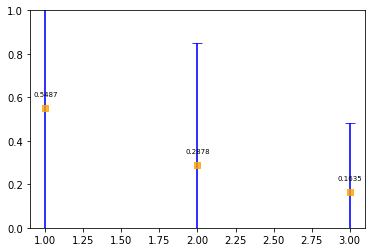

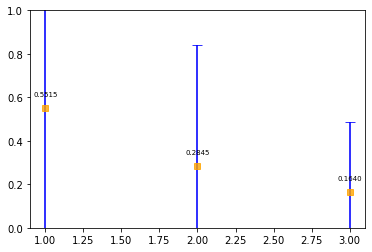

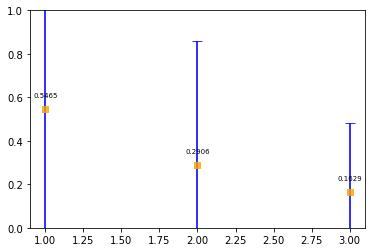

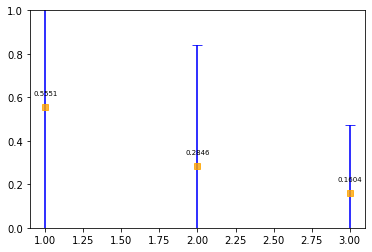

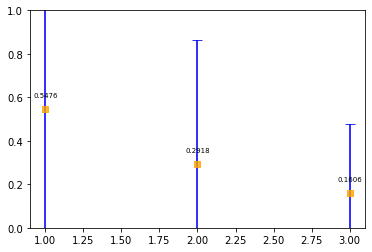

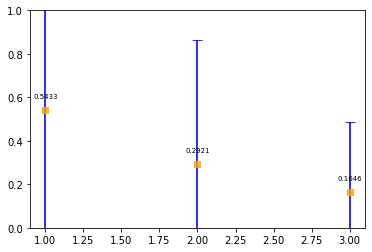

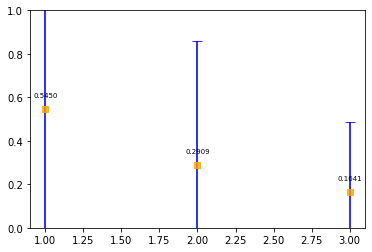

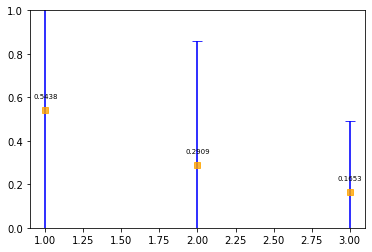

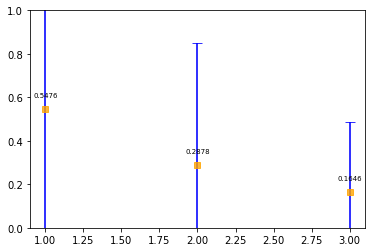

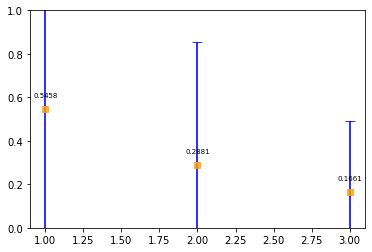

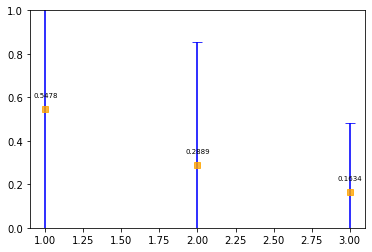

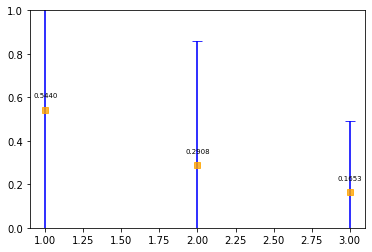

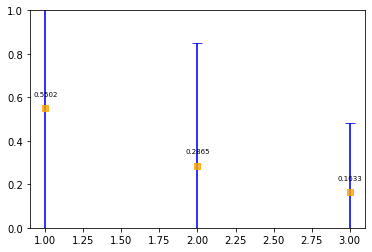

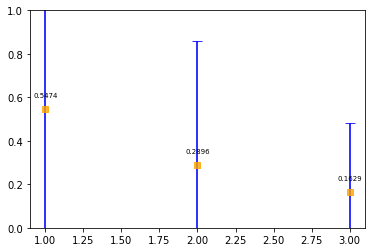

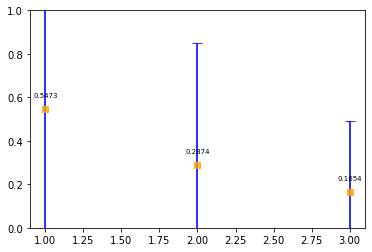

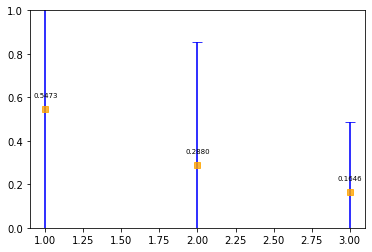

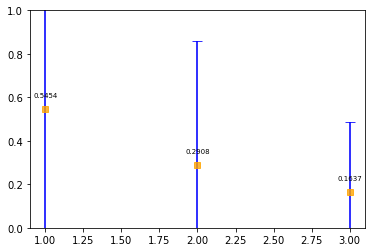

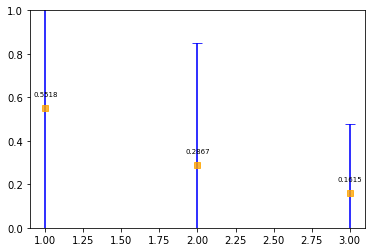

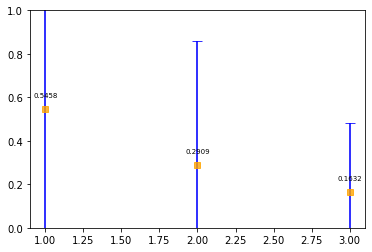

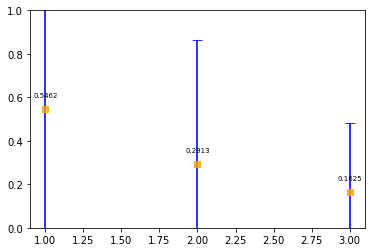

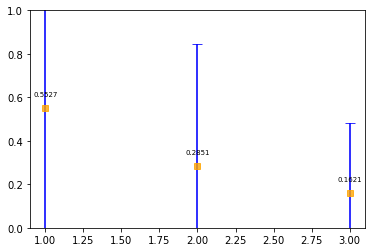

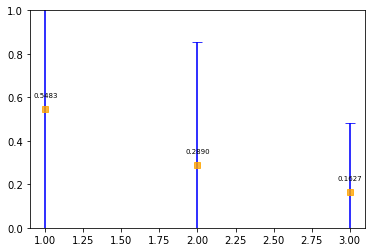

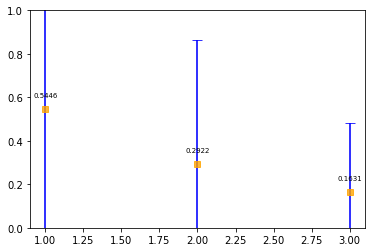

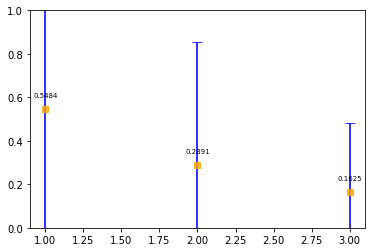

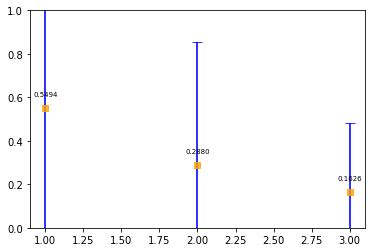

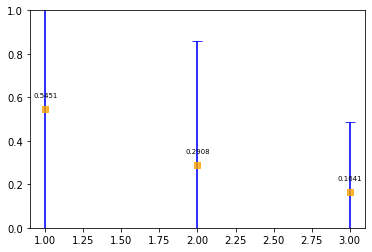

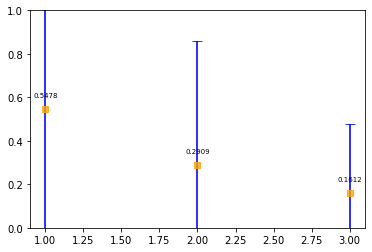

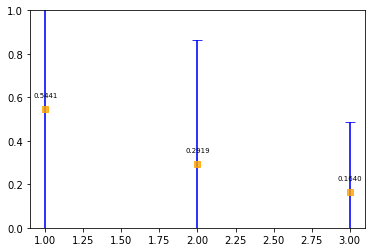

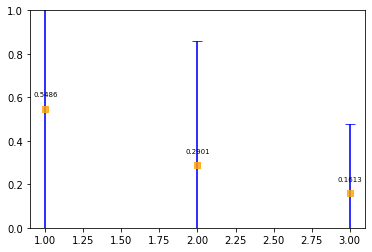

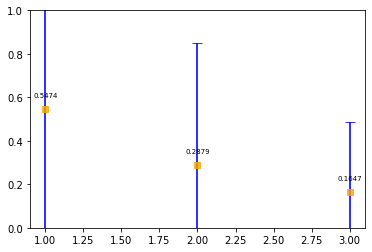

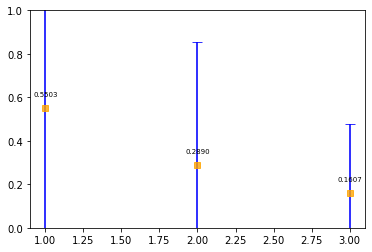

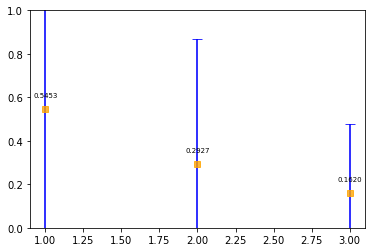

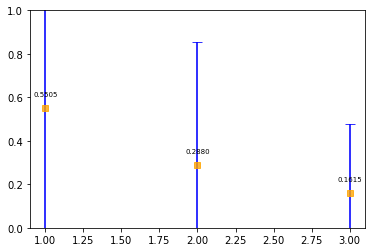

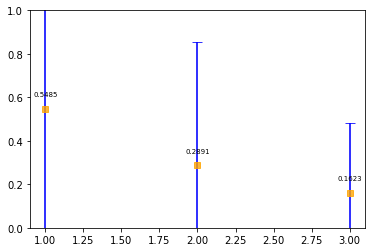

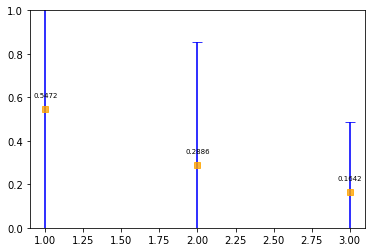

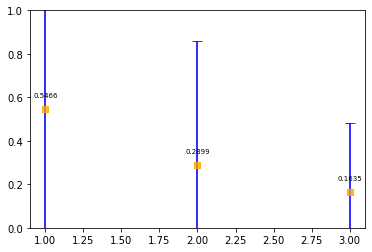

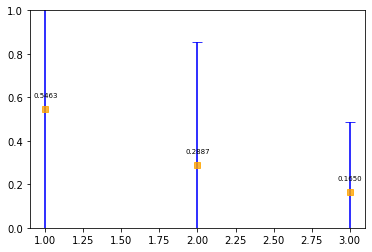

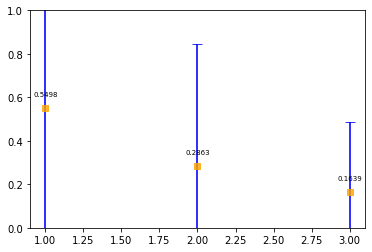

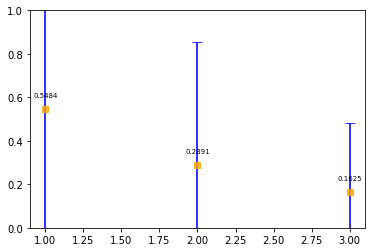

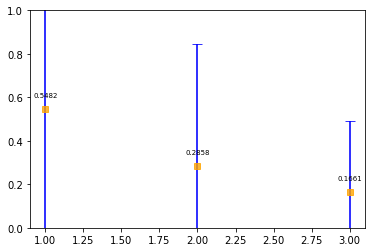

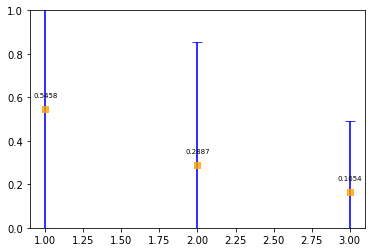

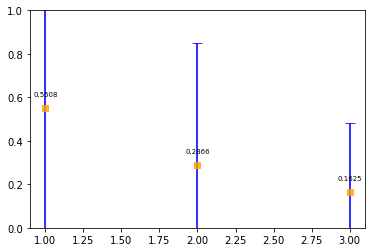

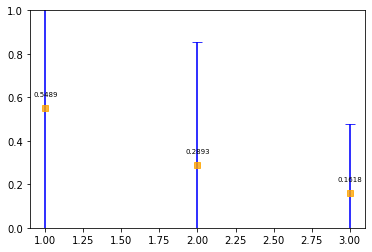

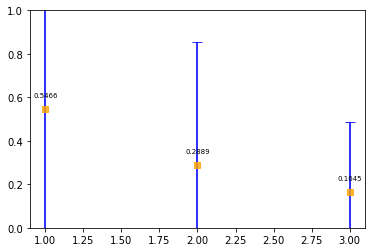

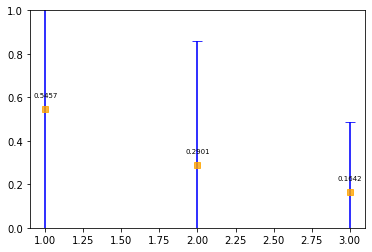

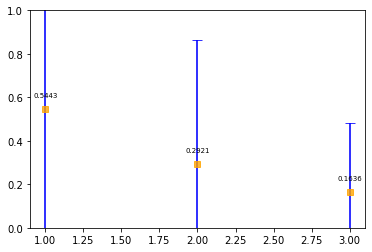

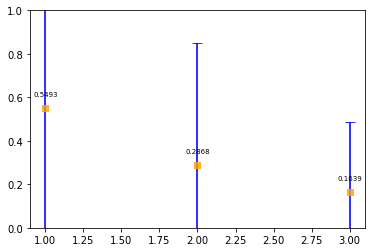

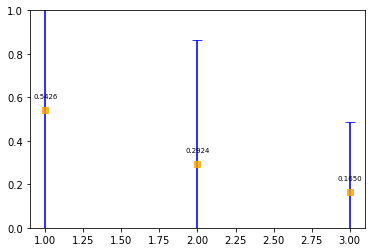

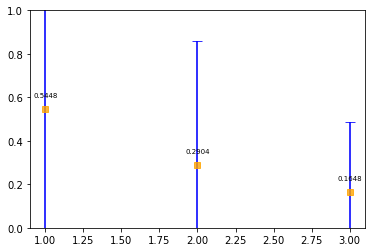

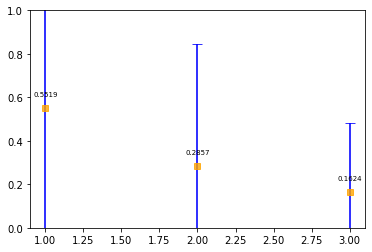

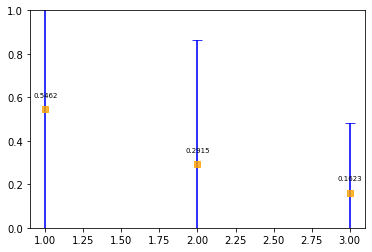

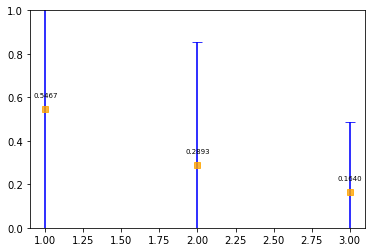

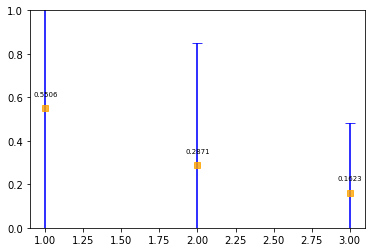

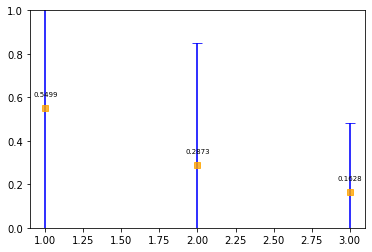

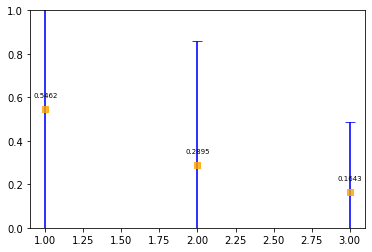

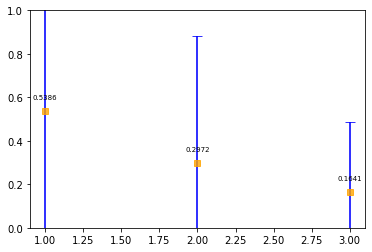

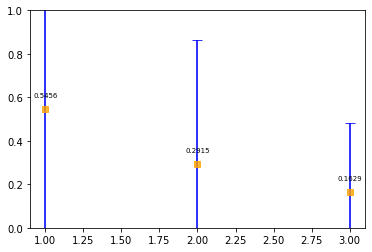

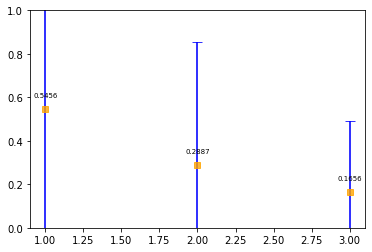

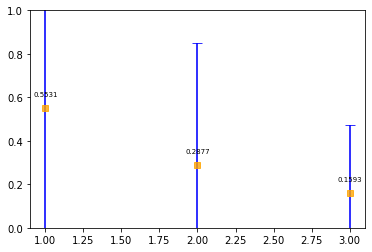

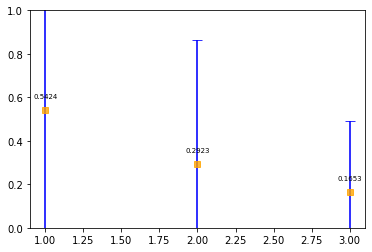

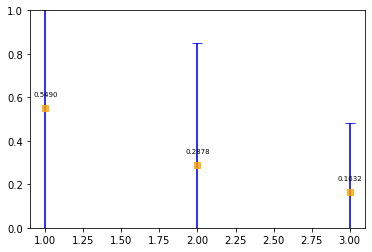

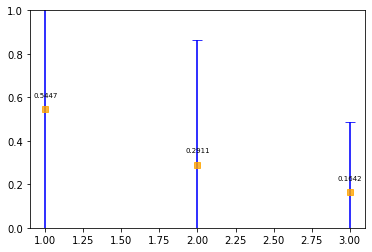

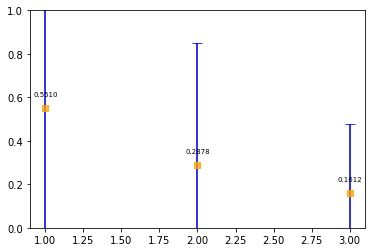

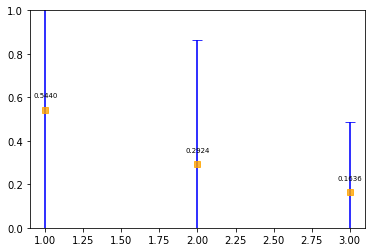

In [29]:
predictions = (y_pred_m > 0.5).astype("int32")
predictions = list(map(lambda x: x==max(x), y_pred_m)) * np.ones(shape=y_pred_m.shape)
for i in range(np.shape(y_test)[0]):
    if predictions[i][1] != y_test[i][1]:
        plt.errorbar(labels,y_pred_m[i],yerr=1.96*y_pred_m[i],fmt='s',ecolor='blue',color='orange',elinewidth=2,capsize=5,alpha=0.8)
        plt.ylim((0, 1))
        for a,b in zip(labels,y_pred_m[i]):
            plt.text(a, b+0.05, '%.4f' % b, ha='center', va= 'bottom',fontsize=7)
            plt.savefig("./Incorrect_Prediction_3D_%s.jpg" %i,bbox_inches="tight")  
         
        plt.show()

In [30]:
predictions

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [31]:
recall_macro(y_test,predictions)

(array([1., 0., 0.]), 0.3333333333333333)

In [32]:
precision_macro(y_test,predictions)

C:\Users\zhang\Desktop\Jupyter Notebook\multi_label_metrics.py:27: RuntimeWarning: invalid value encountered in true_divide
  precision_each_label = true_positives / predicted_positives


(array([0.42352941,        nan,        nan]), nan)

In [33]:
f1_macro(y_test,predictions)

(array([0.59504132,        nan,        nan]), nan)

In [34]:
accuracy_each_label(y_test,predictions)

array([0.42352941, 0.74901961, 0.99607843])

In [35]:
np.mean(accuracy_each_label(y_test,predictions))

0.7228758169934641

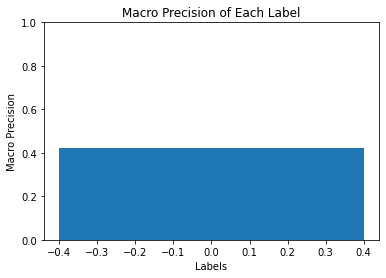

In [36]:
plt.bar(range(3),precision_macro(y_test,predictions)[0])
plt.ylim((0, 1))
plt.title('Macro Precision of Each Label')
plt.ylabel('Macro Precision')
plt.xlabel('Labels')
plt.savefig("./BNN_3D_macro_precision.jpg" )

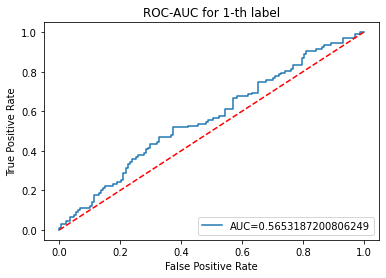

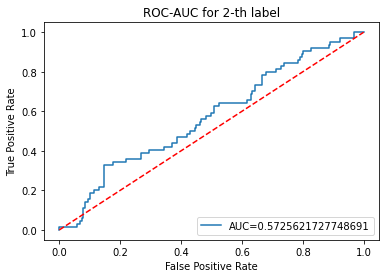

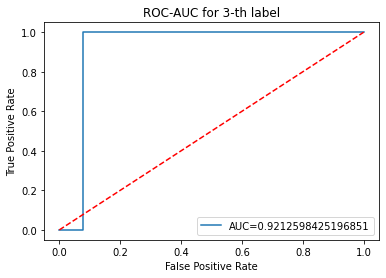

In [37]:
from sklearn import metrics
for i in range(3):
    
    fpr,tpr,threshold=metrics.roc_curve(y_test[:,i],y_pred_m[:,i])
    auc = metrics.roc_auc_score(y_test[:,i],y_pred_m[:,i])

    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.plot([0, 1], [0, 1], linestyle='--',color = "red")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC-AUC for %s-th label' %(i+1))
    plt.legend(loc=4)
    plt.savefig("./3D_ROC_%s.jpg" %(i+1),bbox_inches="tight")
    plt.show()